# Feed Forward Neural Network with Backpropagation - Sigmoid Function

In [2]:
# conda install tensorflow keras matplotlib
# pip install pillow

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# Download The MNIST data. The function automatically returns tupels for test and training sets
# Code reference: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist
# Dataset reference: http://yann.lecun.com/exdb/mnist/

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
len(X_test)

10000

Expected number: 5


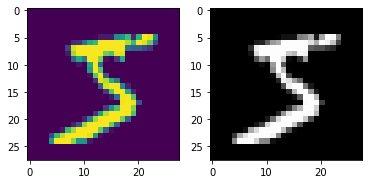

In [6]:
# Plot a image in the dataset (in color and grayscale)
index=0
plt.subplot(121)
plt.imshow(X_train[index])
plt.subplot(122)
plt.imshow(X_train[index],cmap=plt.get_cmap('gray'))
print("Expected number: {}".format(y_train[index]))

In [7]:
# Infos about the dataset
print("Shape of the dataset: {}".format(X_train.shape))
print("Shape of the image: {}".format(X_train[5].shape))
print("Size of the dataset: {}".format(len(X_train)))

Shape of the dataset: (60000, 28, 28)
Shape of the image: (28, 28)
Size of the dataset: 60000


In [8]:
# How does the raw data look like?
print(X_train[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
# Reshape the data from (28,28) to (28,28,1) to get a separate value 
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
# Compare the result with the printout above
print(X_train[index,5,11])

[0]


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# One-hot encoding ot the dependent variabeles
# Code reference: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Create a sequential model
# Code reference: https://keras.io/models/sequential/
model = Sequential()

In [14]:
# Add a first layer with 64 neurons and input shape of (28,28,1). We'll use the sigmoid function for simplicity reasons here
# Code reference: https://keras.io/layers/core/
model.add(Dense(64, activation='sigmoid',input_shape=(28,28,1), name='First'))

In [15]:
# Add a second layer with 32 neurons, it automatically takes the output of the previous layer as inputs
model.add(Dense(32, activation='sigmoid', name = "Second"))

In [16]:
# Flatten everything to a one dimensional layer, which converts the (28,28,1) shape to a one-dimensionsl 784 vector
# Code reference: https://keras.io/layers/core/
model.add(Flatten(name="Flat"))

In [17]:
# Add a final layer with 10 neurons as outputs 
model.add(Dense(10, activation='softmax', name="Last"))

In [18]:
# Show the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First (Dense)                (None, 28, 28, 64)        128       
_________________________________________________________________
Second (Dense)               (None, 28, 28, 32)        2080      
_________________________________________________________________
Flat (Flatten)               (None, 25088)             0         
_________________________________________________________________
Last (Dense)                 (None, 10)                250890    
Total params: 253,098
Trainable params: 253,098
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model using 
# Stochastic Gradient Descent: "sgd" Code reference: https://keras.io/optimizers/
# Loss or objective function: "mean_squared_error" Code reference: https://keras.io/losses/
# Metric: "accuracy" Code reference: https://keras.io/metrics/
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [20]:
#Train the model using the fit function and one iteration (epochs=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0815 - accuracy: 0.3728 - val_loss: 0.0687 - val_accuracy: 0.5396


In [21]:
# relu is usually superior to sigmoid for classification tasks with multiple layers
scores = model.evaluate(X_test, y_test)
print(model.metrics_names)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 3s 256us/sample - loss: 0.0687 - accuracy: 0.5396
['loss', 'accuracy']
Baseline Accuracy: 53.96%


Expected number: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


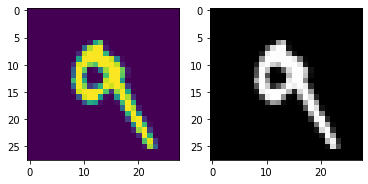

In [22]:
# Plot a image in the dataset (in color and grayscale)
index=0
plt.subplot(121)
plt.imshow(X_test[7])
plt.subplot(122)
plt.imshow(X_test[7],cmap=plt.get_cmap('gray'))
print("Expected number: {}".format(y_train[index]))

In [23]:
import numpy as np
print("Expected: {}".format(y_test[7]))

x1 = np.expand_dims(X_test[7],axis=0)
preds = model.predict_classes(x1)
prob = model.predict(x1)
print(preds)
print(prob)

Expected: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6]
[[0.06580856 0.14192061 0.07411838 0.07668747 0.1228401  0.04737392
  0.14700878 0.1327226  0.08134308 0.11017647]]
